C:\Users\suley\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\polynomial\chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


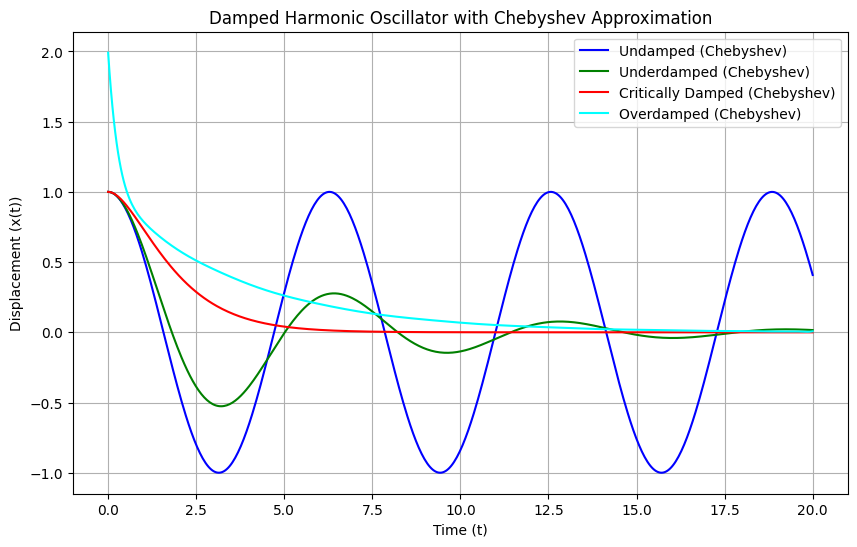

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import chebfit, chebval

# Differential equation solution
def damped_oscillator_solution(t, zeta, omega_0):
    # Analytical solution to damped harmonic oscillator
    if zeta < 1:  # Underdamped
        omega_d = omega_0 * np.sqrt(1 - zeta**2)
        return np.exp(-zeta * omega_0 * t) * (np.cos(omega_d * t) + zeta / np.sqrt(1 - zeta**2) * np.sin(omega_d * t))
    elif zeta == 1:  # Critically damped
        return np.exp(-omega_0 * t) * (1 + omega_0 * t)
    else:  # Overdamped
        r1 = -omega_0 * (zeta - np.sqrt(zeta**2 - 1))
        r2 = -omega_0 * (zeta + np.sqrt(zeta**2 - 1))
        return np.exp(r1 * t) + np.exp(r2 * t)

# Parameters
omega_0 = 1
zeta_values = [0.0, 0.2, 1.0, 2.0]
colors = ['blue', 'green', 'red', 'cyan']
labels = ['Undamped', 'Underdamped', 'Critically Damped', 'Overdamped']

# Time points
t = np.linspace(0, 20, 500)
degree = 20  # Degree of Chebyshev polynomial

# Plot Chebyshev approximation
plt.figure(figsize=(10, 6))
for zeta, color, label in zip(zeta_values, colors, labels):
    y = damped_oscillator_solution(t, zeta, omega_0)
    # Fit Chebyshev polynomials to the solution
    cheb_coeffs = chebfit(t, y, degree)
    y_approx = chebval(t, cheb_coeffs)
    
    plt.plot(t, y_approx, color=color, label=f'{label} (Chebyshev)', linestyle='solid')

# Add labels and legend
plt.title('Damped Harmonic Oscillator with Chebyshev Approximation')
plt.xlabel('Time (t)')
plt.ylabel('Displacement (x(t))')
plt.legend()
plt.grid()
plt.show()
